In [3]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [15]:
#Problem#3

#2: Find the equilibrium for n=1
import sympy as sm
 
k_l=0
gamma_p=1
gamma_r=1
k_p=1
k_0=1
K=0.5
n=1
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = k_l+(k_0*(c/K)**n)/(1+(c/K)**n)-gamma_r*r
C = r*k_p-gamma_p*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(0.0, 0.0), (0.500000000000000, 0.500000000000000)]


In [17]:
#2: Find the equilibrium for n=10
import sympy as sm
 
k_l=0
gamma_p=1
gamma_r=1
k_p=1
k_0=1
K=0.5
n=10
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = k_l+(k_0*(c/K)**n)/(1+(c/K)**n)-gamma_r*r
C = r*k_p-gamma_p*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(0.0, 0.0), (0.500000000000000, 0.500000000000000)]


In [ ]:
# Conclusion: We get the same number of fixed points for n=1 and n=10.

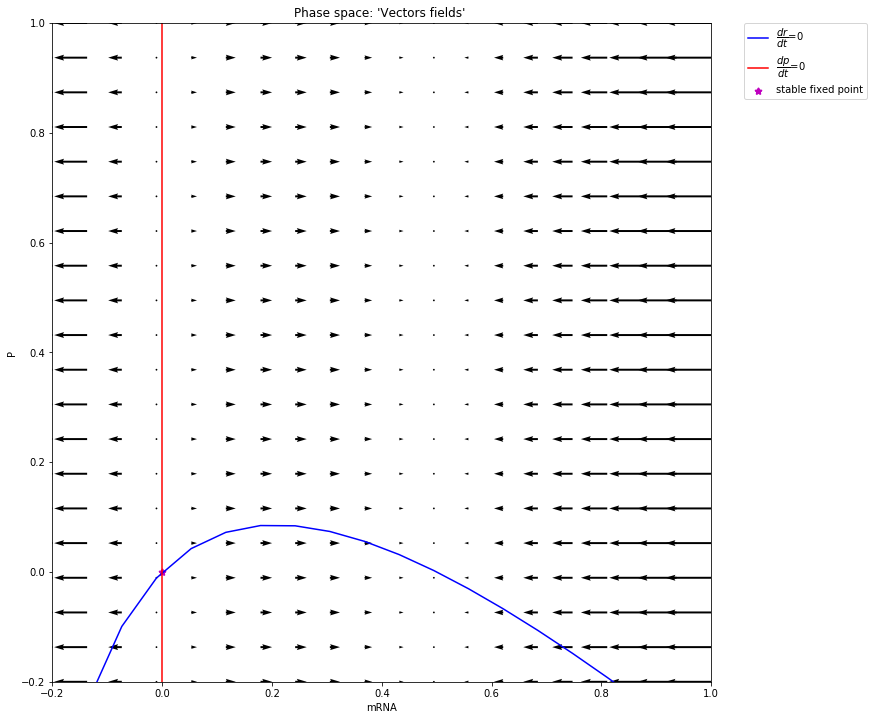

In [26]:
#n=1
x = np.linspace(-0.2,1,20)
y = np.linspace(-0.2,1,20)
X,Y = np.meshgrid(x,y)
n=1
u = ((Y/K)**n)/((1+Y/K)**n)-Y
v = X-Y
p = y
r1 = ((p/K)**n)/((1+p/K)**n)
r2 = p
u = k_l+(k_0*(y/K)**n)/(1+(y/K)**n)-gamma_r*x 
v = x*k_p-gamma_p*y
A = x
B = y
dA_0 = k_l+(k_0*(y/K)**n)/(1+(y/K)**n)-gamma_r*x #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = x*k_p-gamma_p*y #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dr}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dp}{dt}$=0')
ax.scatter(0,0, marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("mRNA")
ax.set_ylabel("P")  
ax.set_title("Phase space: 'Vectors fields' ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

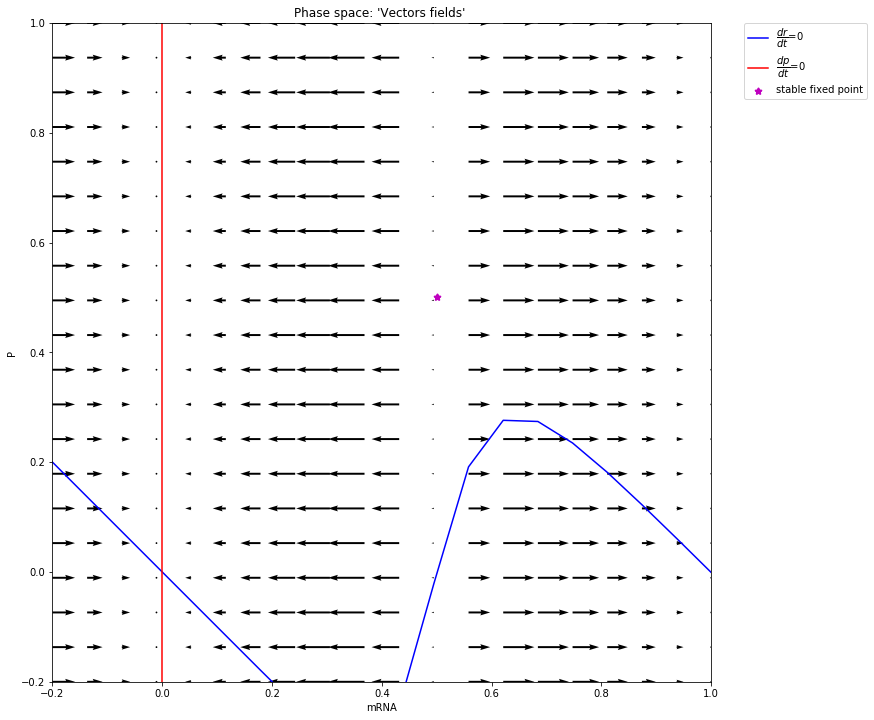

In [33]:
#n=10
x = np.linspace(-0.2,1,20)
y = np.linspace(-0.2,1,20)
X,Y = np.meshgrid(x,y)
n=10
u = ((Y/K)**n)/((1+Y/K)**n)-Y
v = X-Y
p = y
r1 = ((p/K)**n)/((1+p/K)**n)
r2 = p
u = k_l+(k_0*(y/K)**n)/(1+(y/K)**n)-gamma_r*x 
v = x*k_p-gamma_p*y
A = x
B = y
dA_0 = k_l+(k_0*(y/K)**n)/(1+(y/K)**n)-gamma_r*x #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = x*k_p-gamma_p*y #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dr}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dp}{dt}$=0')
ax.scatter(0.5,0.5, marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("mRNA")
ax.set_ylabel("P")  
ax.set_title("Phase space: 'Vectors fields' ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

In [ ]:
# Conclusion: Stability for (0,0) for n=10 and unstability for n=1
#For n=1, (0.5,0.5) is stable

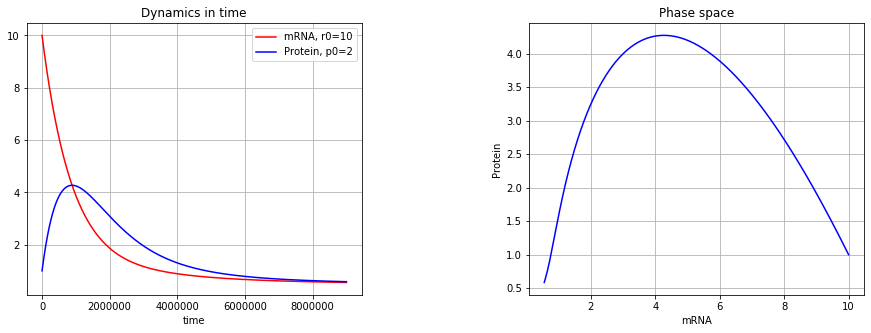

In [61]:
# define system in terms of a Numpy array
k_l=0
gamma_p=1
gamma_r=1
k_p=1
k_0=1
K=0.5
n=1
def Sys(X, t=0):
    """ The rate equations that describe the BRD switch, """
    # here X[0] = r and x[1] = p    
    return np.array([ k_l+(k_0*(X[1]/K)**n)/(1+(X[1]/K)**n)-gamma_r*X[0] , X[0]*k_p-gamma_p*X[1]])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 10,  9000000)
# initial values: r0 = 10, p0 = 1
Sys0 = np.array([10, 1])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='mRNA, r0=10')
ax1.plot(y, 'b-', label='Protein, p0=2')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("mRNA")
ax2.set_ylabel("Protein")
ax2.set_title("Phase space")
ax2.grid()

In [ ]:
#For n=1, (0.5,0.5) is stable

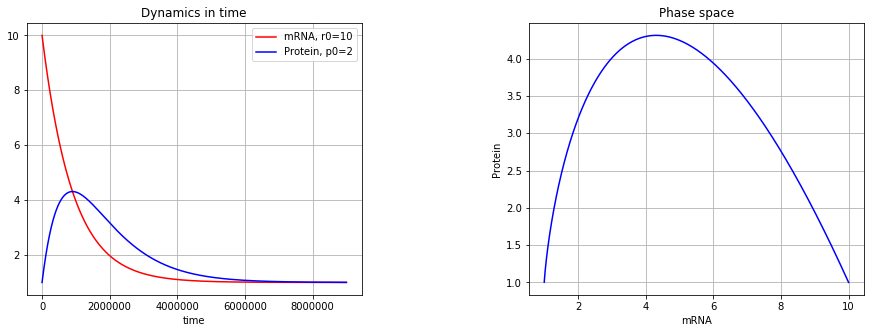

In [4]:
# define system in terms of a Numpy array
k_l=0
gamma_p=1
gamma_r=1
k_p=1
k_0=1
K=0.5
n=10
def Sys(X, t=0):
    """ The rate equations that describe the BRD switch, """
    # here X[0] = r and x[1] = p    
    return np.array([ k_l+(k_0*(X[1]/K)**n)/(1+(X[1]/K)**n)-gamma_r*X[0] , X[0]*k_p-gamma_p*X[1]])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 10,  9000000)
# initial values: r0 = 10, p0 = 1
Sys0 = np.array([10, 1])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='mRNA, r0=10')
ax1.plot(y, 'b-', label='Protein, p0=2')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("mRNA")
ax2.set_ylabel("Protein")
ax2.set_title("Phase space")
ax2.grid()

In [ ]:
# (0,0) is stable for n=10

In [40]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
import time
from scipy.integrate import solve_ivp

In [41]:
def pb03(x,k_p,k_0,gamma_p,gamma_r,K,T,time_on_init,time_on_end):
    # x=[Y,Z] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,0],[-1,1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([k_l+k_0/(1+(x[i,0]/k)**10), gamma_r*x[i,0],k_p*x[i,0],gamma_p*x[i,1]])
        sum_a=np.sum(a)
        #print("sum_a= ", sum_a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        #try:
         #   j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        #except ValueError:  
         #   pass
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        #print("x= ", x)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        #print("t_x= ", t_x)
        i+=1
    return x,t_x

In [57]:
#Case01: Strong Regulation: K=100
k_l=0.001
k_p=0.17
k_0=0.01
gamma_p=0.00028
gamma_r=0.00083
K=100
x0=10
y0=1
x = np.array([x0,y0]).reshape(1,2)
T = 90000
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = pb03(x,k_p,k_0,gamma_p,gamma_r,K,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");
import math

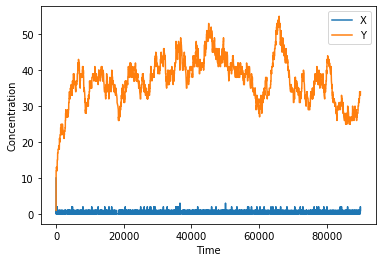

In [58]:
plt.plot(t_x,x[:,0],label='X')
plt.plot(t_x,x[:,1],label='Y')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()

In [59]:
#Case01: Weak Regulation: K=10000
k_l=0.001
k_p=0.17
k_0=0.01
gamma_p=0.00028
gamma_r=0.00083
K=10000
x0=10
y0=1
x = np.array([x0,y0]).reshape(1,2)
T = 90000
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = pb03(x,k_p,k_0,gamma_p,gamma_r,K,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");
import math

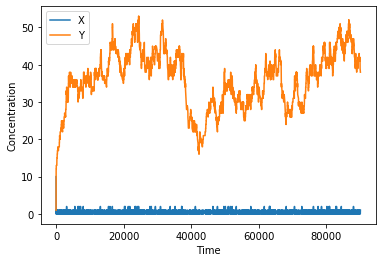

In [60]:
plt.plot(t_x,x[:,0],label='X')
plt.plot(t_x,x[:,1],label='Y')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()